In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./data/Human/train.csv')
test = pd.read_csv('./data/Human/test.csv')

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [5]:
test.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


In [6]:
cols = train.columns


In [7]:
# checking if there's any null values in the dataset
train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [8]:
# checking the datatypes of the featues
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [9]:
# checking the presence of classwise instances
# this helps understading if the dataset is skewed or biased towards a particular class or not

instance_plot = train['Activity'].value_counts()

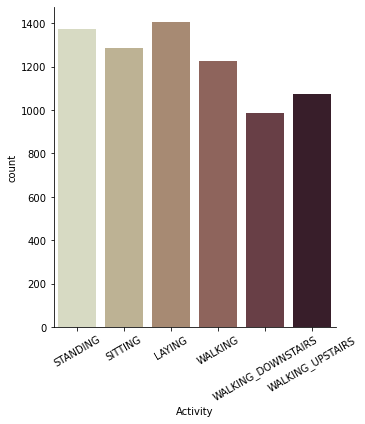

In [10]:
g = sns.catplot(x="Activity", kind="count", palette="ch:.5", data=train)
g.set_xticklabels(rotation=30)

### As we can't visualize more than 3 dim, we need some way to see the relations between each of these features.
### Pairplot is a great way to visualize higher dimention feature relation.
### But as we have 563 features, we can't possibly use pairplot because then we would have to generate
### 563C2 = 158203 number of total plots.
#### But, we can visualize the relation between acceration 3-dir data and gyroscope 3-dir data

# Feature Selection and Feature Engineering.

####  We're using PCA in the pipeline and all data will be normalized using StandardScaler.

In [31]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [32]:
# Creating the train and test set from the dataframe.

X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
Y_train = train.Activity.values.astype(object)

X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
Y_test = test.Activity.values.astype(object)

# Printing the dimension of Train and Test set 
print("Dimension X_Train : ",X_train.shape)
print("Dimension X_Test",X_test.shape,"\n")

Dimension X_Train :  (7352, 561)
Dimension X_Test (2947, 561) 



# Building pipeline of different classifiers

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


from sklearn.linear_model import RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

from sklearn.metrics import confusion_matrix
import seaborn as sns


In [34]:
encoder = LabelEncoder()

# encoding train labels 
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train)

# encoding test labels 
encoder.fit(Y_test)
Y_test = encoder.transform(Y_test)

### Pipelines

In [35]:
pipe_lr = Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=250)),
                     ('lr_classifier',LogisticRegression(random_state=42))])

In [36]:
pipe_SGD = Pipeline([('scaler3',StandardScaler()),
                    ('pca6',PCA(n_components = 250)),
                    ('sgd', SGDClassifier(penalty='elasticnet',
                                  alpha=0.00001,
                                  max_iter=10000,
                                  tol=0.001))])

In [37]:
pipe_XG = Pipeline([ ('pca3', PCA(n_components = 250)),
                     ('xg_classifier', XGBClassifier())])

In [38]:
pipe_DT = Pipeline([ ('pca4', PCA(n_components = 250)),
                     ('dt_classifier', DecisionTreeClassifier())])

In [39]:
pipe_RCV = Pipeline([('scaler2', StandardScaler()),
                     ('pca5', PCA(n_components = 250)),
                     ('knn_classifier', RidgeClassifierCV(cv=10))])

In [40]:
# list of pipelines
pipelines = [pipe_lr,pipe_SGD,pipe_XG, pipe_DT,pipe_RCV]

# Training Pipeline

In [21]:
best_accuracy = 0
best_algorithm = 0
best_pipeline = ""

In [22]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, Y_train)


# Scaling the values

In [23]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Results and analysis

## Logistic Regression

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       537
           1       0.81      0.83      0.82       491
           2       0.98      0.31      0.47       532
           3       0.69      0.88      0.77       496
           4       0.85      0.95      0.90       420
           5       0.78      0.93      0.84       471

    accuracy                           0.81      2947
   macro avg       0.83      0.81      0.79      2947
weighted avg       0.83      0.81      0.78      2947

Training set score for Logistic Regression: 0.831610
Testing  set score for Logistic Regression: 0.806583


<function sklearn.pipeline.Pipeline.score(self, X, y=None, sample_weight=None)>

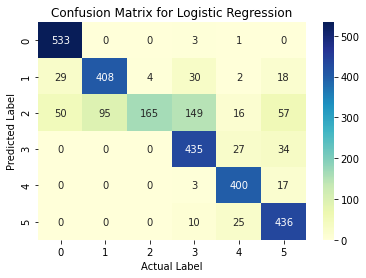

In [24]:

Y_pred_lr = pipe_lr.predict(X_test_scaled)

cf_matrix = confusion_matrix(Y_test,Y_pred_lr)
fig = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap="YlGnBu")
fig.set_title("Confusion Matrix for Logistic Regression")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
print(classification_report(Y_test,Y_pred_lr))

print("Training set score for Logistic Regression: %f" % pipe_lr.score(X_train_scaled , Y_train))
print("Testing  set score for Logistic Regression: %f" % pipe_lr.score(X_test_scaled  , Y_test ))


pipe_lr.score


# Stochastic Gradient Descent

              precision    recall  f1-score   support

           0       0.38      1.00      0.55       537
           1       0.00      0.00      0.00       491
           2       0.00      0.00      0.00       532
           3       0.88      0.73      0.79       496
           4       0.58      1.00      0.73       420
           5       0.83      0.72      0.77       471

    accuracy                           0.56      2947
   macro avg       0.45      0.57      0.47      2947
weighted avg       0.43      0.56      0.46      2947

Training set score for SGD: 0.551279
Testing  set score for SGD: 0.560909


<function sklearn.pipeline.Pipeline.score(self, X, y=None, sample_weight=None)>

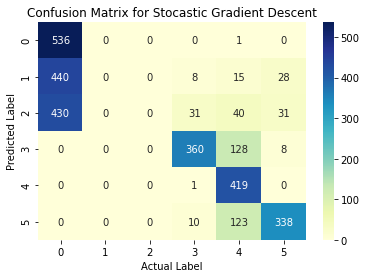

In [25]:

Y_pred_sgd = pipe_SGD.predict(X_test_scaled)

cf_matrix = confusion_matrix(Y_test,Y_pred_sgd)
fig = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap="YlGnBu")
fig.set_title("Confusion Matrix for Stocastic Gradient Descent")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
print(classification_report(Y_test,Y_pred_sgd))

print("Training set score for SGD: %f" % pipe_SGD.score(X_train_scaled , Y_train))
print("Testing  set score for SGD: %f" % pipe_SGD.score(X_test_scaled  , Y_test ))


pipe_SGD.score


# XGBoost

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       537
           1       0.75      0.72      0.73       491
           2       0.87      0.67      0.76       532
           3       0.76      0.55      0.64       496
           4       0.42      0.98      0.59       420
           5       0.84      0.21      0.34       471

    accuracy                           0.69      2947
   macro avg       0.75      0.69      0.66      2947
weighted avg       0.76      0.69      0.67      2947

Training set score for XGBoost: 0.732182
Testing  set score for XGBoost: 0.687139


<function sklearn.pipeline.Pipeline.score(self, X, y=None, sample_weight=None)>

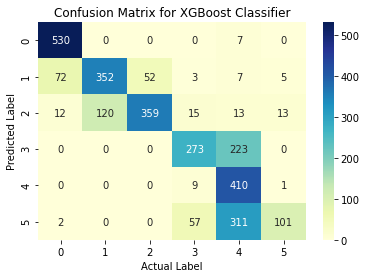

In [26]:

Y_pred_xg = pipe_XG.predict(X_test_scaled)

cf_matrix = confusion_matrix(Y_test,Y_pred_xg)
fig = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap="YlGnBu")
fig.set_title("Confusion Matrix for XGBoost Classifier")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
print(classification_report(Y_test,Y_pred_xg))

print("Training set score for XGBoost: %f" % pipe_XG.score(X_train_scaled , Y_train))
print("Testing  set score for XGBoost: %f" % pipe_XG.score(X_test_scaled  , Y_test ))


pipe_XG.score

# Decision Tree 

              precision    recall  f1-score   support

           0       0.54      0.22      0.31       537
           1       0.27      0.48      0.34       491
           2       0.51      0.34      0.41       532
           3       0.29      0.03      0.05       496
           4       0.22      0.21      0.22       420
           5       0.33      0.73      0.46       471

    accuracy                           0.33      2947
   macro avg       0.36      0.33      0.30      2947
weighted avg       0.37      0.33      0.30      2947

Training set score for Decision Tree: 0.345620
Testing  set score for Decision Tree: 0.332542


<function sklearn.pipeline.Pipeline.score(self, X, y=None, sample_weight=None)>

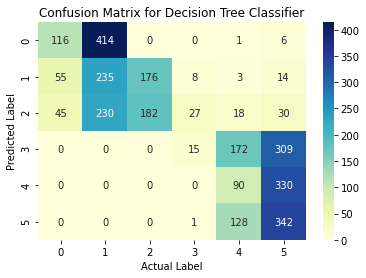

In [27]:

Y_pred_dt = pipe_DT.predict(X_test_scaled)

cf_matrix = confusion_matrix(Y_test,Y_pred_dt)
fig = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap="YlGnBu")
fig.set_title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
print(classification_report(Y_test,Y_pred_dt))

print("Training set score for Decision Tree: %f" % pipe_DT.score(X_train_scaled , Y_train))
print("Testing  set score for Decision Tree: %f" % pipe_DT.score(X_test_scaled  , Y_test ))


pipe_DT.score

# Support Vector Classification with Gridsearch optimization

In [42]:
# Create the parameter grid based on the results of random search 

parameters = [{'C': [500], 'kernel': ['rbf'], 'gamma': [0.001]}]

# SVM MODEL with gridsearch 
# n_jobs -1 means use all cpu cores
# cv = 10 means 10 fold cross validation


model_SVM = GridSearchCV(SVC(), 
                         parameters, 
                         scoring='accuracy',
                         cv=10,
                        n_jobs=-1)

model_SVM.fit(X_train_scaled, Y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [500], 'gamma': [0.001], 'kernel': ['rbf']}],
             scoring='accuracy')

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       537
           1       0.98      0.89      0.93       491
           2       0.92      0.98      0.95       532
           3       0.96      0.98      0.97       496
           4       0.98      0.93      0.95       420
           5       0.93      0.96      0.95       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Training set score for Decision Tree: 1.000000
Testing  set score for Decision Tree: 0.958941


<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [500], 'gamma': [0.001], 'kernel': ['rbf']}],
             scoring='accuracy')>

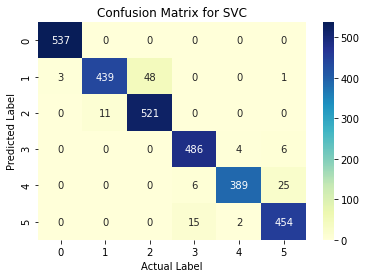

In [43]:

Y_pred_svc = model_SVM.predict(X_test_scaled)

cf_matrix = confusion_matrix(Y_test,Y_pred_svc)
fig = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap="YlGnBu")
fig.set_title("Confusion Matrix for SVC")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
print(classification_report(Y_test,Y_pred_svc))

print("Training set score for Decision Tree: %f" % model_SVM.score(X_train_scaled , Y_train))
print("Testing  set score for Decision Tree: %f" % model_SVM.score(X_test_scaled  , Y_test ))


model_SVM.score

# Ridge Classifier CV

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       537
           1       0.60      0.81      0.69       491
           2       0.68      0.94      0.79       532
           3       0.92      0.74      0.82       496
           4       0.97      0.77      0.86       420
           5       0.94      0.61      0.74       471

    accuracy                           0.80      2947
   macro avg       0.85      0.80      0.81      2947
weighted avg       0.84      0.80      0.81      2947

Training set score for Ridge CV: 0.838819
Testing  set score for Ridge CV: 0.804886


<function sklearn.pipeline.Pipeline.score(self, X, y=None, sample_weight=None)>

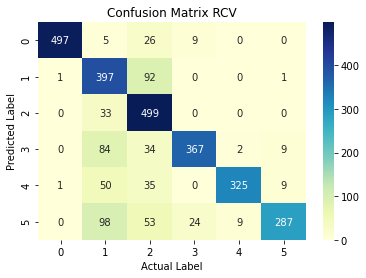

In [29]:

Y_pred_rcv = pipe_RCV.predict(X_test_scaled)

cf_matrix = confusion_matrix(Y_test,Y_pred_rcv)
fig = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap="YlGnBu")
fig.set_title("Confusion Matrix RCV")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
print(classification_report(Y_test,Y_pred_rcv))

print("Training set score for Ridge CV: %f" % pipe_RCV.score(X_train_scaled , Y_train))
print("Testing  set score for Ridge CV: %f" % pipe_RCV.score(X_test_scaled  , Y_test ))


pipe_RCV.score